In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/Trabalho_2_PLN/

/content/gdrive/My Drive/Colab Notebooks/Trabalho_2_PLN


In [2]:
import string
import re
from pickle import load
from pickle import dump
import pickle
import numpy as np
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector, TimeDistributed, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

Using TensorFlow backend.


In [0]:
# function to read raw text file
def read_text(filename):
        # open the file
        file = open(filename, mode='rt', encoding='utf-8')
        
        # read all text
        text = file.read()
        file.close()
        return text

# split a text into sentences
def to_lines(text):
      sents = text.strip().split('\n')
      sents = [i.split('\t') for i in sents]
      return sents

data = read_text("dataset_en_pt.txt")
eng_pt = to_lines(data)
eng_pt = array(eng_pt)
eng_pt = eng_pt[:50000]

# Remove punctuation
for s in range(0, len(eng_pt)):
  eng_port[s:0] = eng_pt[s][0].translate(str.maketrans('', '', string.punctuation))
  eng_port[s:1] = eng_pt[s][1].translate(str.maketrans('', '', string.punctuation))

# convert text to lowercase
for i in range(len(eng_pt)):
    eng_port[i,0] = eng_port[i,0].lower()
    eng_port[i,1] = eng_port[i,1].lower()

NameError: ignored

In [3]:
eng_port = pd.read_pickle("english-portuguese.pkl")

FileNotFoundError: ignored

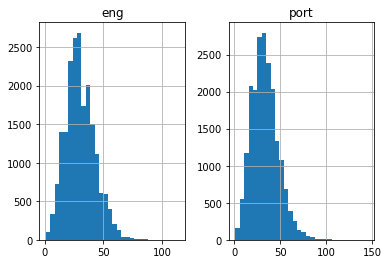

In [0]:
# empty lists
eng_l = []
port_l = []

dataset_ingles = list()
dataset_portugues = list()

for x in range(0, len(eng_port)):
  dataset_ingles.append(eng_port[x][0])
  dataset_portugues.append(eng_port[x][1])
dataset_ingles = dataset_ingles[:20000]
dataset_portugues = dataset_portugues[:20000]
# populate the lists with sentence lengths
for i in range(0,20000):
      eng_l.append(len(dataset_ingles[i]))

for i in range(0,20000):
      port_l.append(len(dataset_portugues[i]))

length_df = pd.DataFrame({'eng':eng_l, 'port':port_l})

length_df.hist(bins = 30)
plt.show()

In [0]:
print(length_df)

       eng  port
0        4     4
1       18    21
2       15    18
3       26    29
4       13    19
...    ...   ...
19995   40    51
19996   35    39
19997   40    48
19998   49    53
19999   40    42

[20000 rows x 2 columns]


In [0]:
# function to build a tokenizer
def tokenization(lines):
      tokenizer = Tokenizer()
      tokenizer.fit_on_texts(lines)
      return tokenizer

# prepare english tokenizer
eng_tokenizer = tokenization(dataset_ingles)
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

# prepare portuguese tokenizer
port_tokenizer = tokenization(dataset_portugues)
port_vocab_size = len(port_tokenizer.word_index) + 1

port_length = 8
print('Portuguese Vocabulary Size: %d' % port_vocab_size)

English Vocabulary Size: 6580
Portuguese Vocabulary Size: 8514


In [0]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
         # integer encode sequences
         seq = tokenizer.texts_to_sequences(lines)
         # pad sequences with 0 values
         seq = pad_sequences(seq, maxlen=length, padding='post')
         return seq

In [0]:
from sklearn.model_selection import train_test_split

#eng_pt = pd.DataFrame({'eng':dataset_ingles, 'port':dataset_portugues})
eng_pt = list(map(list, zip(dataset_ingles, dataset_portugues)))


# split data into train and test set
train, test = train_test_split(eng_pt, test_size=0.2, random_state = 12)

train_ingles = list()
train_portugues = list()
for x in range(0, len(train)):
  train_ingles.append(train[x][0])
  train_portugues.append(train[x][1])

test_ingles = list()
test_portugues = list()
for x in range(0, len(test)):
  test_ingles.append(test[x][0])
  test_portugues.append(test[x][1])


# prepare training data
trainX = encode_sequences(port_tokenizer, port_length, train_portugues)
trainY = encode_sequences(eng_tokenizer, eng_length, train_ingles)

# prepare validation data
testX = encode_sequences(port_tokenizer, port_length, test_portugues)
testY = encode_sequences(eng_tokenizer, eng_length, test_ingles)

In [0]:
for x in range(0,30):
  print(eng_pt[x])

['enus', 'ptbr']
['in and out of love', 'dentro e fora do amor']
['young and wired', 'jovem e eletrizada']
['set to explode in the heat', 'pronta para explodir no calor']
['you wont tire', 'voce nao se cansara']
['cause baby was born with the beat', 'porque voce nasceu com a batida']
['take you higher than youve ever known', 'leve voce mais alto do que pudesse imaginar']
['then drive you down to your knees', 'entao volte para baixo de joelhos']
['i pick you up when youve had enough', 'eu te levanto quando voce estiver satisfeita']
['you been burned baby lessons learned', 'voce foi queimada querida licoes aprendidas']
['in and out of love', 'dentro e fora do amor']
['in and out of love', 'dento e fora do amor']
['the way that were playing', 'e a maneira que estamos jogando']
['in and out of love', 'dentro e fora do amor']
['too much is never enough', 'o demais nunca e suficiente']
['shes gonna get ya', 'ela vai conseguir te pegar']
['running wild', 'correndo como uma selvagem']
['when m

In [0]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(Dropout(rate=0.5))
      model.add(LSTM(units))
      model.add(Dropout(rate=0.7))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(units, return_sequences=True))
      model.add(Dropout(rate=0.5))
      model.add(Dense(out_vocab, activation='softmax'))
      return model


In [0]:
# model compilation
model = define_model(eng_vocab_size, port_vocab_size, eng_length, port_length, 512)

In [0]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')
#model.compile(optimizer='adam', loss='categorical_crossentropy')

In [0]:
filename = 'model3_20_d_30ep_b128.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=128, validation_split = 0.4,callbacks=[checkpoint], 
                    verbose=1)

Train on 9600 samples, validate on 6400 samples
Epoch 1/30
9600/9600 [==============================] - 4s 384us/step - loss: 0.1697 - val_loss: 2.7895

Epoch 00001: val_loss improved from inf to 2.78954, saving model to model3_20_d_30ep_b128.h5
Epoch 2/30
3968/9600 [===========>..................] - ETA: 1s - loss: 0.1351

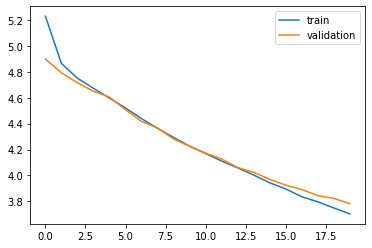

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

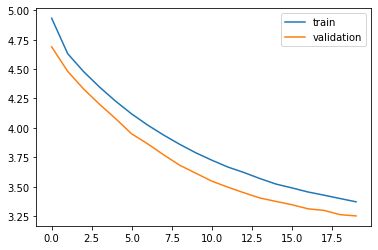

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [0]:
model = load_model('model3_20_d_20ep_b64.h5')

In [0]:
testZ = testX[:500]
preds = model.predict_classes(testZ.reshape((testZ.shape[0],testZ.shape[1])))

In [0]:
def get_word(n, tokenizer):
      for word, index in tokenizer.word_index.items():
          if index == n:
              return word
      return None

In [0]:
preds_text = []
for i in preds:
       temp = []
       for j in range(len(i)):
            t = get_word(i[j], eng_tokenizer)
            if j > 0:
                if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                     temp.append('')
                else:
                     temp.append(t)
            else:
                   if(t == None):
                          temp.append('')
                   else:
                          temp.append(t) 

       preds_text.append(' '.join(temp))

In [0]:
pred_df = pd.DataFrame({'actual' : test_ingles[:500],'predicted' : preds_text})
#pred_df = pd.DataFrame({'actual' : test_ingles[:500], 'portugues' : test_portugues[:500],'predicted' : preds_text})
# print 15 rows randomly
pred_df.sample(15)

,actual,predicted
289,its slippin away,im am away
91,if the river i cried aint that long,the and i aint no
373,play this record as frequently as possible,the
488,i dont like the soon come,i know have the
346,and her line of credits high,the and
112,youve got to know that we love alove each other yeah,love a or
345,moeru moeru moeru like fire,signed tteugeowo like fire
395,for some love some disguised as lust,a
34,no regrets,no apologies
116,i know the game you play i know it well,i the that i say


In [0]:
from pickle import load
from numpy import array
from numpy import argmax
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
 
# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))
 
# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer
 
# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)
 
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X
 
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None
 
# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)
 
# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src = raw_dataset[i]
		if i < 10:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
 
# load model
model = load_model('model_300_30ep_b128.hdf5')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test)